Invalid age value in line: 100 - - 1 0000
Invalid age value in line: 375 - - 1 0000
Invalid age value in line: 393 - - 1 0000
Invalid age value in line: 395 - - 1 0000
Invalid age value in line: 421 - - 1 0000
Invalid age value in line: 455 - - 1 0000
Invalid age value in line: 485 - - 1 0000
Invalid age value in line: 510 - - 0 0010
Invalid age value in line: 527 - - 1 0000
Invalid age value in line: 565 - - 1 0000
Invalid age value in line: 594 - - 1 0000
Invalid age value in line: 603 - - 1 0000
Invalid age value in line: 608 - - 1 0000
Invalid age value in line: 610 - - 1 0000
Invalid age value in line: 680 - - 1 0000
Invalid age value in line: 703 - - 1 0000
Invalid age value in line: 711 - - 1 0000
Invalid age value in line: 738 - - 1 0000
Invalid age value in line: 760 - - 1 0000
Invalid age value in line: 778 - - 1 0000
Invalid age value in line: 817 - - 1 0000
Invalid age value in line: 827 - - 1 0000
Invalid age value in line: 836 - - 1 0000


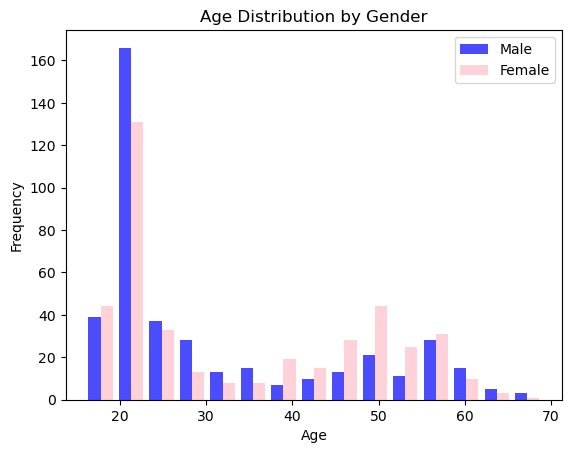

In [3]:
import matplotlib.pyplot as plt

def read_data(filename):
    ages_male = []
    ages_female = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) != 5:  # Check if the line has the expected number of values
                continue
            
            gender = parts[1]
            try:
                age = int(parts[2])  # Convert age to integer, it may fail if age is not a number
            except ValueError:
                print(f"Invalid age value in line: {line.strip()}")
                continue
            if gender == 'm':
                ages_male.append(age)
            elif gender == 'f':
                ages_female.append(age)

    return ages_male, ages_female

def plot_distribution(ages_male, ages_female):
    plt.hist([ages_male, ages_female], bins=15, label=['Male', 'Female'], color=['blue', 'pink'], alpha=0.7)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Age Distribution by Gender')
    plt.show()

# Adjust the following line to the path of your .txt file
filename = 'H:\\Maurer\\facescape\\info_list_v2.txt'

ages_male, ages_female = read_data(filename)
plot_distribution(ages_male, ages_female)

Statistics for Gender (0 = male, 1 = female):
Gender (0 = male, 1 = female)
0    783
1    366
Name: count, dtype: int64



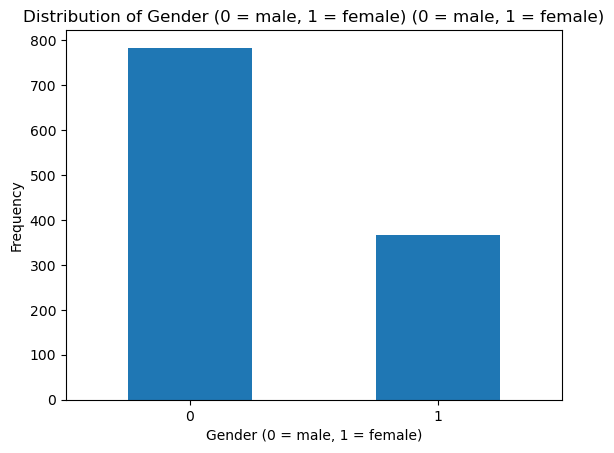

Statistics for Age (0: <=40, 1: >40, 2 UNKOWN):
Age (0: <=40, 1: >40, 2 UNKOWN)
0    916
1    215
2     18
Name: count, dtype: int64



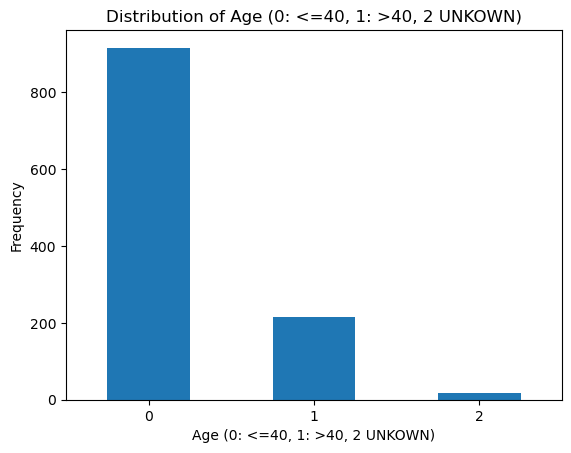

Statistics for Ethnicity (0 = Caucasians, 1 = Africans, 2 = Asians, 3 = East Indians, 4 = Unknown):
Ethnicity (0 = Caucasians, 1 = Africans, 2 = Asians, 3 = East Indians, 4 = Unknown)
0    465
2    375
3    253
1     50
4      6
Name: count, dtype: int64



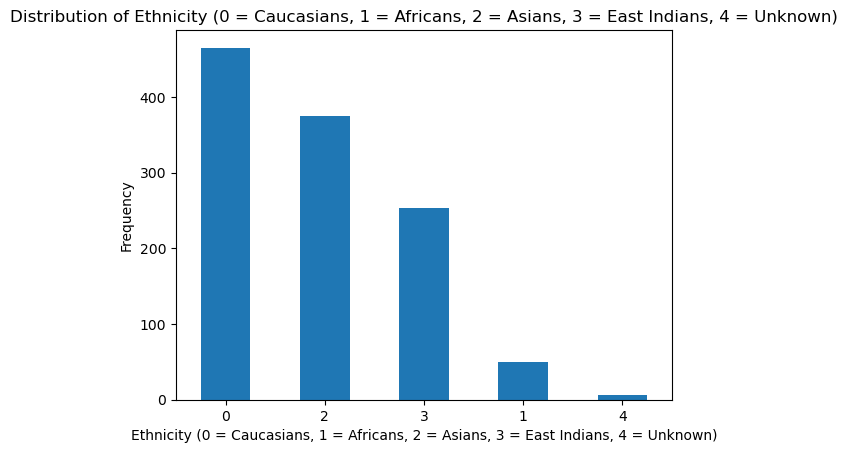

Statistics for Camera Type (1=Brighter, 2= more recent dull):
Camera Type (1=Brighter, 2= more recent dull)
1    609
2    540
Name: count, dtype: int64



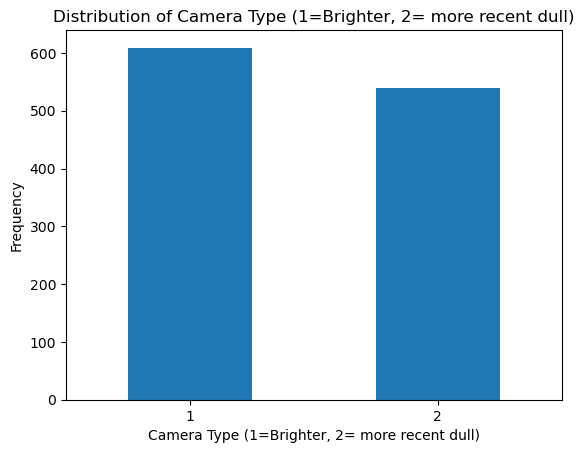

Statistics for Expression (0 = Neutral, 1 = Non - neutral):
Expression (0 = Neutral, 1 = Non - neutral)
0    813
1    336
Name: count, dtype: int64



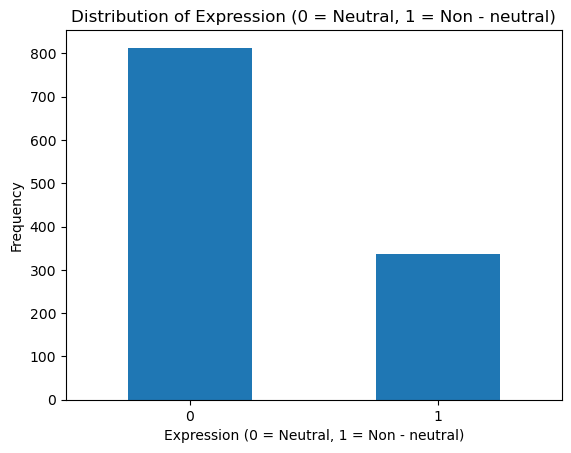

Statistics for Training (0 excluded, 1 = included):
Training (0 excluded, 1 = included)
0    789
1    360
Name: count, dtype: int64



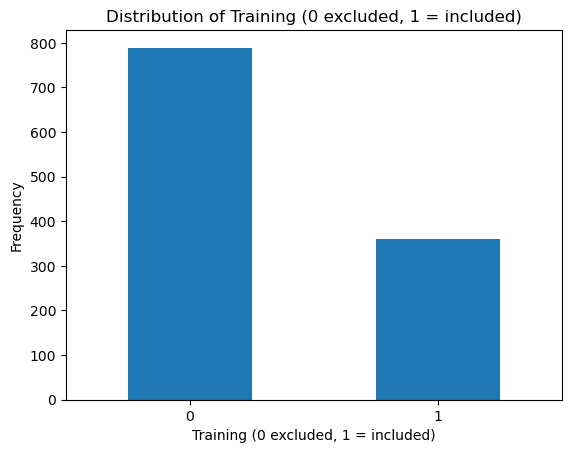

Statistics for Gallery (0 = exluded, 1 = included):
Gallery (0 = exluded, 1 = included)
0    1044
1     105
Name: count, dtype: int64



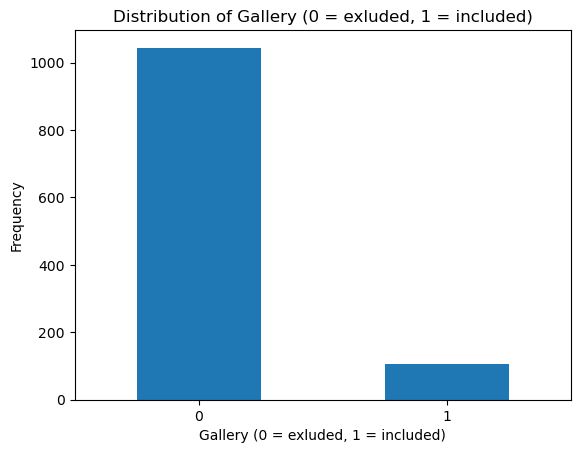

Statistics for Probe Neutral (0 excluded, 1 = included):
Probe Neutral (0 excluded, 1 = included)
0    669
1    480
Name: count, dtype: int64



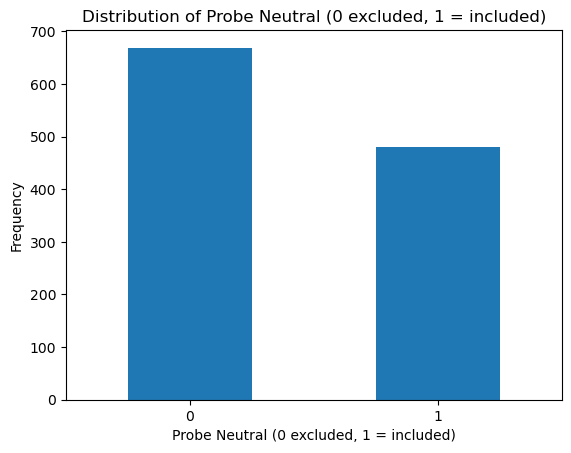

Statistics for Probe Expressive (0 excluded, 1 = included):
Probe Expressive (0 excluded, 1 = included)
0    966
1    183
Name: count, dtype: int64



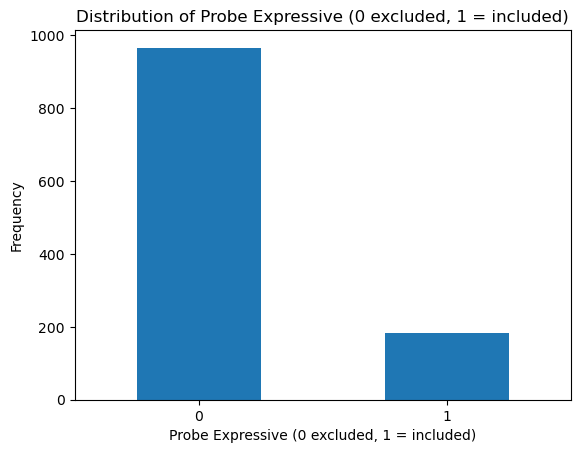

Statistics for Remaining (0 excluded, 1 = included):
Remaining (0 excluded, 1 = included)
0    1128
1      21
Name: count, dtype: int64



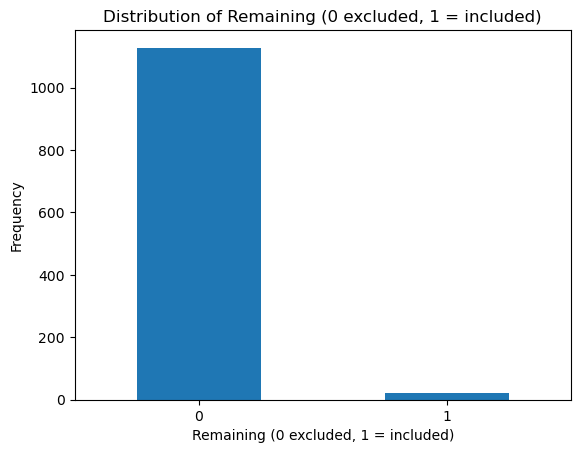

Statistics for Training Gallery (0 = excluded, 1 = included):
Training Gallery (0 = excluded, 1 = included)
0    1137
1      12
Name: count, dtype: int64



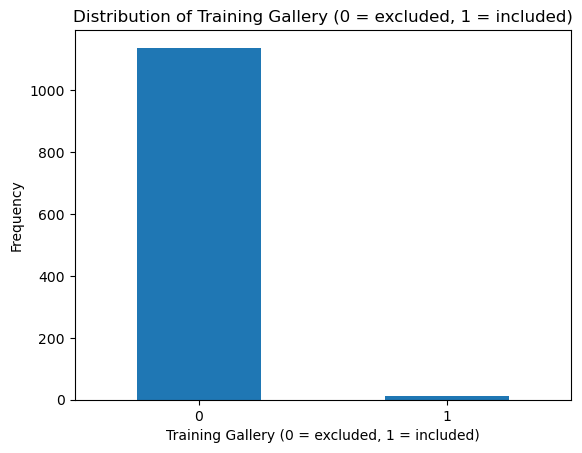

Statistics for Training Probe Neutral (0 = excluded, 1 = included):
Training Probe Neutral (0 = excluded, 1 = included)
0    933
1    216
Name: count, dtype: int64



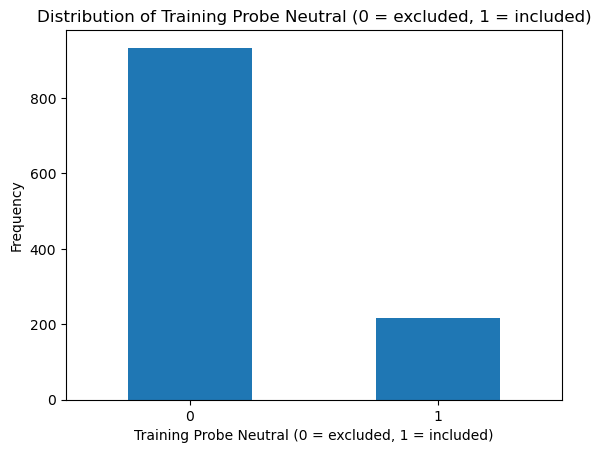

Statistics for Training Probe Expressive (0 = excluded, 1 = included):
Training Probe Expressive (0 = excluded, 1 = included)
0    1017
1     132
Name: count, dtype: int64



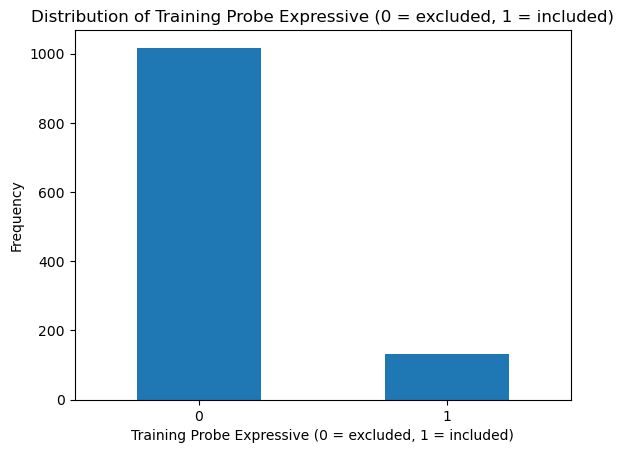

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot the distribution of a categorical variable
def plot_categorical_distribution(df, column_name, title_suffix=''):
    distribution = df[column_name].value_counts()
    distribution.plot(kind='bar', rot=0)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}{title_suffix}')
    plt.show()

# Function to get the statistics of the DataFrame
def get_statistics(df):
    for column in df.columns:
        if column not in ['Range File Names', 'Portrait File Names', 'Subject Unique ID']:
            try:
                unique_values = df[column].nunique()
                if unique_values < 10:  # Let's consider only the columns with a low count of unique values
                    print(f'Statistics for {column}:')
                    print(df[column].value_counts())
                    print()  # Add a space between stats

                    # Plot each categorical column
                    title_suffix = '' if 'Gender' not in column else ' (0 = male, 1 = female)'
                    plot_categorical_distribution(df, column, title_suffix)
            except Exception as e:
                print(f'Could not get statistics for {column}: {e}')

# Read the Excel file into a DataFrame
df = pd.read_excel('H:\Maurer\Texas3DFRDatabase\Texas3DFR_Info.xls')

# Call the function with the loaded DataFrame
get_statistics(df)


Geschlecht - Prozentangaben:
m: 79.49%
f: 20.51%


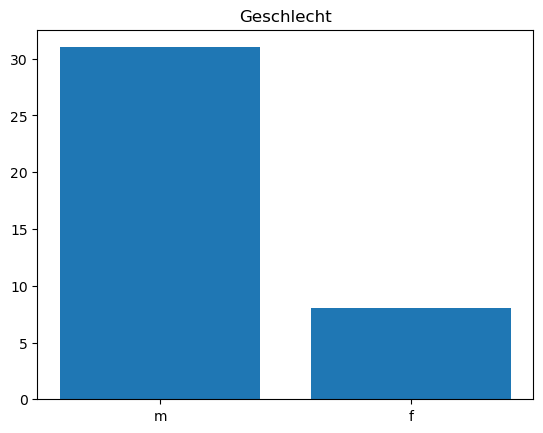


Alter - Prozentangaben:
3: 10.26%
2: 53.85%
1: 35.90%


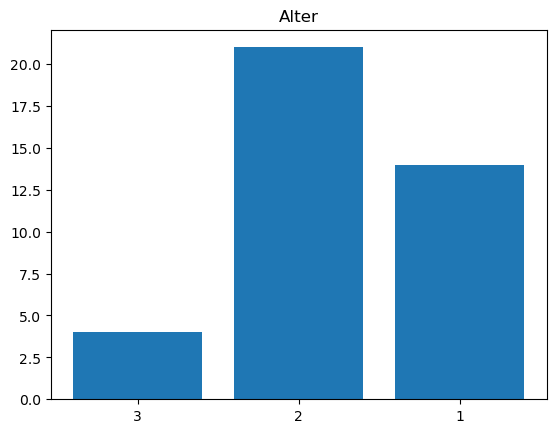


Herkunft - Prozentangaben:
europe: 84.62%
arabic: 12.82%
southasian: 2.56%


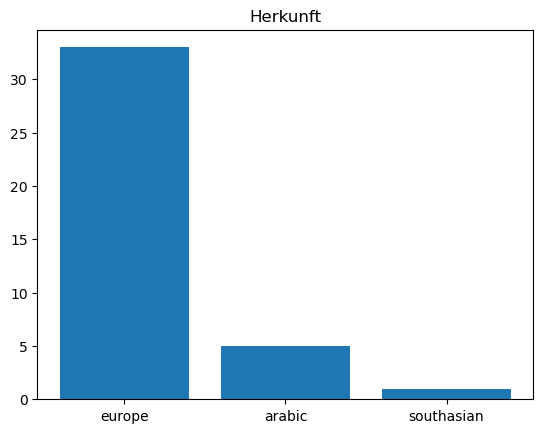

In [9]:
import matplotlib.pyplot as plt
geschlecht_dict = {}
klasse_dict = {}
kategorie_dict = {}
gesamt_zeilen = 0

# Öffnen der Datei und Durchgehen jeder Zeile
with open('H:\\Maurer\\Bellus\\Datensatz.txt', 'r') as file:
    for line in file:
        gesamt_zeilen += 1
        # Ignoriere das erste Element und entferne unerwünschte Leerzeichen
        _, geschlecht, klasse, kategorie = line.strip().split(',')

        # Zähle die einzigartigen Geschlechter
        geschlecht_dict[geschlecht] = geschlecht_dict.get(geschlecht, 0) + 1
        
        # Zähle die einzigartigen Klassen/Bewertungen
        klasse_dict[klasse] = klasse_dict.get(klasse, 0) + 1
        
        # Zähle die einzigartigen Kategorien
        kategorie_dict[kategorie] = kategorie_dict.get(kategorie, 0) + 1


# Hilfsfunktion, um Prozentangaben zu berechnen und Balkendiagramme zu zeichnen
def zeige_statistik_und_balkendiagramm(werte_dict, titel):
    labels = list(werte_dict.keys())
    anzahl = list(werte_dict.values())
    prozent = [x / gesamt_zeilen * 100 for x in anzahl]

    # Ausgabe der Prozentangaben
    print(f"\n{titel} - Prozentangaben:")
    for label, pct in zip(labels, prozent):
        print(f"{label}: {pct:.2f}%")

    # Erstellen des Balkendiagramms
    plt.bar(labels, anzahl)
    plt.title(titel)
    plt.show()

zeige_statistik_und_balkendiagramm(geschlecht_dict, "Geschlecht")
zeige_statistik_und_balkendiagramm(klasse_dict, "Alter")
zeige_statistik_und_balkendiagramm(kategorie_dict, "Herkunft")